![example](images/image01.jpg)

# ENHANCING HOME OWNER DECISION- MAKING 

# GROUP 8

* Student pace:  part time
* Instructor name: ASHA DEEN


# MEMBERS
* JULIET WANJA THUKU
* KELVIN MUIA
* SYLVESTER MAGUNDA
* STEPHEN KIMITI



# BUSINESS UNDERSTANDING

#  DATA

In [1]:
#import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numbers
import numpy as np
import statsmodels.api as sm
import sklearn

In [2]:
data =pd.read_csv('kc_house_data (1).csv')
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [4]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [5]:
#identify columns with missing values
data.isnull().sum()


id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [6]:
#drop 'yr_renovated'column because of the of many missing values
data_df = data.drop('yr_renovated', axis=1)
data_df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,Average,7 Average,1180,0.0,1955,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,2170,400.0,1951,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,6 Low Average,770,0.0,1933,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,7 Average,1050,910.0,1965,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,8 Good,1680,0.0,1987,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,Average,8 Good,1530,0.0,2009,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,Average,8 Good,2310,0.0,2014,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,Average,7 Average,1020,0.0,2009,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,Average,8 Good,1600,0.0,2004,98027,47.5345,-122.069,1410,1287


In [7]:
data_df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [8]:
data['waterfront'].unique()

array([nan, 'NO', 'YES'], dtype=object)

In [9]:
#drop all missing values
data_df.dropna(axis=0, inplace=True)

In [10]:
data_df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [11]:
#confirm unique elements
data_df['view'].unique()

array(['NONE', 'GOOD', 'EXCELLENT', 'AVERAGE', 'FAIR'], dtype=object)

In [12]:
#drop column view it contains values
data_df.drop('view', axis=1,inplace =True)

In [13]:
data_df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15'],
      dtype='object')

In [14]:
data_df.drop(['sqft_above','sqft_basement','zipcode','lat','long','sqft_lot15','sqft_living15',],axis=1,inplace=True)

In [15]:
data_df.columns


Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'condition', 'grade', 'yr_built'],
      dtype='object')

In [16]:
data_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,Average,7 Average,1951
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,Average,6 Low Average,1933
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,Very Good,7 Average,1965
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,Average,8 Good,1987
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,NO,Average,11 Excellent,2001


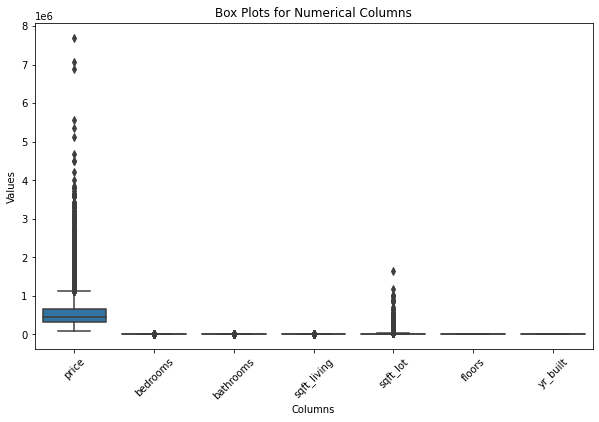

In [17]:
import seaborn as sns
data = ['price','bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'yr_built']
num_df = data_df[ data]
plt.figure(figsize=(10,6))
sns.boxplot(data=num_df)
plt.xticks(rotation=45)
plt.title("Box Plots for Numerical Columns")
plt.xlabel("Columns")
plt.ylabel("Values")
plt.show()

In [18]:
#Change 'date' column data type from object to datetime
data_df['date'] = pd.to_datetime(data_df['date'])
print("Data type of 'date' column has been changed to:", data_df['date'].dtype)

Data type of 'date' column has been changed to: datetime64[ns]


In [19]:
#Create a function that maps dates to seasons
def create_seasons(date):
    if date.month in [12, 1, 2]:
        return 'Winter'
    elif date.month in [3, 4, 5]:
        return 'Spring'
    elif date.month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

In [20]:
#Apply the function to create the new 'season' column
data_df['season'] = data_df['date'].apply(create_seasons)
data_df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built,season
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,NO,Average,7 Average,1951,Winter
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,NO,Average,6 Low Average,1933,Winter
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,NO,Very Good,7 Average,1965,Winter
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,NO,Average,8 Good,1987,Winter
5,7237550310,2014-05-12,1230000.0,4,4.50,5420,101930,1.0,NO,Average,11 Excellent,2001,Spring
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21591,2997800021,2015-02-19,475000.0,3,2.50,1310,1294,2.0,NO,Average,8 Good,2008,Winter
21592,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,NO,Average,8 Good,2009,Spring
21593,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,NO,Average,8 Good,2014,Winter
21594,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,NO,Average,7 Average,2009,Summer


In [21]:
data_df["condition"].value_counts()

Average      12437
Good          5041
Very Good     1509
Fair           152
Poor            25
Name: condition, dtype: int64

In [22]:
data_df["grade"].value_counts()

7 Average        7949
8 Good           5398
9 Better         2311
6 Low Average    1804
10 Very Good     1014
11 Excellent      356
5 Fair            212
12 Luxury          81
4 Low              25
13 Mansion         13
3 Poor              1
Name: grade, dtype: int64

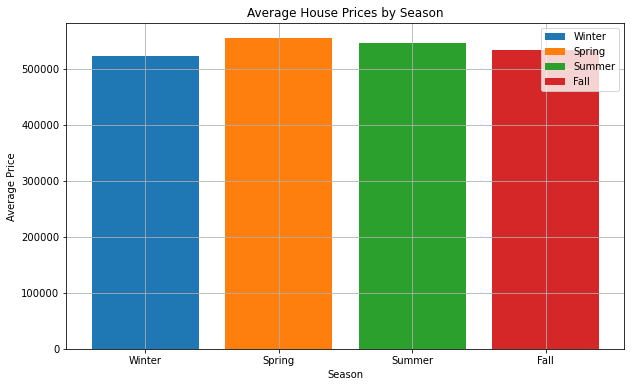

In [28]:
seasons = data_df['season'].unique()
plt.figure(figsize=(10, 6))

for season in seasons:
    season_data = data_df[data_df['season'] == season]
    plt.bar(season, season_data['price'].mean(), label=season)

plt.xlabel('Season')
plt.ylabel('Average Price')
plt.title('Average House Prices by Season')
plt.legend()
plt.grid(True)

plt.show()